### Readme
notebook que carga y analiza el fichero JSON con información de repositorios
los datos se han obtenido via API GraphQL y REST API de github

### Carga de librerías y fichero de datos. comprobaciones básicas

In [2]:
# imports de librerías requeridas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import json
from tabulate import tabulate
import locale

In [3]:
#pd.set_option('display.precision', 2)  # Configurar la precisión de decimales

# Configurar la visualización para que los números se muestren en formato europeo
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x).replace(',', 'X').replace('.', ',').replace('X', '.'))

In [4]:
#DATA_FILE='D:\\Dev\\github-scrapping-02\\Data\\xmerge-metadata.json'
DATA_FILE='D:\\Dev\\github-scrapping-02\\Data\\df_clean.json'

In [5]:
# Leer el archivo JSON y convertir las columnas de fecha
df = pd.read_json(DATA_FILE, orient='records', lines=True, convert_dates=['createdAt', 'pushedAt', 'updatedAt'])

In [6]:
df_copy=df.copy()

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37120 entries, 0 to 37119
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    37120 non-null  object        
 1   description             35030 non-null  object        
 2   stargazerCount          37120 non-null  int64         
 3   forkCount               37120 non-null  int64         
 4   createdAt               37120 non-null  datetime64[ns]
 5   updatedAt               37120 non-null  datetime64[ns]
 6   pushedAt                37120 non-null  datetime64[ns]
 7   diskUsage               37120 non-null  int64         
 8   isArchived              37120 non-null  bool          
 9   isEmpty                 37120 non-null  bool          
 10  isFork                  37120 non-null  bool          
 11  isInOrganization        37120 non-null  bool          
 12  isPrivate               37120 non-null  bool  

In [8]:
df_copy.describe()

,stargazerCount,forkCount,createdAt,updatedAt,pushedAt,diskUsage,contributors,issues,forks,assignableUsers,deployments,environments,milestones,releases,pullRequests,watchers,language_count
count,"37.120,00","37.120,00",37120,37120,37120,"37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00"
mean,"641,05","122,97",2020-02-19 03:46:37.047333376,2024-07-23 21:48:27.877990144,2022-12-27 23:51:34.475673344,"54.013,99","9,35","72,76","118,59","12,56","70,11","0,66","0,68","10,18","100,17","20,18","3,13"
min,"98,00","0,00",2018-01-01 00:20:19,2020-04-27 13:20:23,2018-01-02 07:06:03,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","1,00"
25%,"252,00","29,00",2018-10-29 16:24:22.750000128,2024-07-18 09:34:19.750000128,2022-01-17 19:49:45.249999872,"475,00","1,00","5,00","28,00","1,00","0,00","0,00","0,00","0,00","2,00","8,00","1,00"
50%,"406,00","61,00",2019-10-25 04:31:29.500000,2024-08-21 12:47:21,2023-06-16 18:49:58,"2.931,00","3,00","19,00","59,00","1,00","0,00","0,00","0,00","0,00","11,00","13,00","2,00"
75%,"691,00","122,00",2021-02-22 19:33:54.750000128,2024-09-04 17:38:52,2024-06-09 01:58:46.500000,"16.806,00","9,00","56,00","118,00","3,00","0,00","0,00","0,00","6,00","48,00","23,00","4,00"
max,"36.939,00","43.148,00",2024-08-29 19:52:32,2024-09-19 08:21:50,2024-09-19 01:08:58,"105.078.627,00","100,00","26.175,00","42.880,00","2.267,00","287.890,00","5.262,00","229,00","1.000,00","23.809,00","2.675,00","10,00"
std,"1.138,44","412,44",NaN,NaN,NaN,"1.031.953,50","16,72","305,62","397,63","127,56","1.780,88","34,54","4,37","41,43","458,81","40,06","2,25"


In [10]:
# arreglar DateTime

# Convertir las columnas DateTime al formato correcto
#df_copy['createdAt'] = pd.to_datetime(df_copy['createdAt'], errors='coerce')
#df_copy['updatedAt'] = pd.to_datetime(df_copy['updatedAt'], errors='coerce')
#df_copy['pushedAt'] = pd.to_datetime(df_copy['pushedAt'], errors='coerce')

# Formatear las fechas al formato estándar "YYYY-MM-DD HH:MM:SS"
#df_copy['createdAt'] = df_copy['createdAt'].dt.strftime('%Y-%m-%d %H:%M:%S')
#df_copy['updatedAt'] = df_copy['updatedAt'].dt.strftime('%Y-%m-%d %H:%M:%S')
#df_copy['pushedAt'] = df_copy['pushedAt'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Guardar el DataFrame corregido a un archivo JSON
#output_file = 'D:\\Dev\\github-scrapping-02\\Data\\df_clean_fixed_dateTime.json'
#df_copy.to_json(output_file, orient='records', date_format='iso', lines=True)



In [11]:
# Definición de las columnas numéricas y categóricas según la estructura de df_copy
columnas_numericas = [
    'stargazerCount',
    'forkCount',
    'diskUsage',
    'contributors',
    'issues.totalCount',
    'forks.totalCount',
    'assignableUsers.totalCount',
    'deployments.totalCount',
    'environments.totalCount',
    'milestones.totalCount',
    'releases.totalCount',
    'pullRequests.totalCount',
    'watchers.totalCount'
]

columnas_categoricas = [
    'name',
    'description',
    'isArchived',
    'isEmpty',
    'isFork',
    'isInOrganization',
    'isPrivate',
    'isTemplate',
    'hasIssuesEnabled',
    'hasWikiEnabled',
    'hasProjectsEnabled',
    'hasSponsorshipsEnabled',
    'mergeCommitAllowed',
    'viewerCanSubscribe',
    'owner.login',
    'owner.url',
    'licenseInfo.name',
    'primaryLanguage.name',
    'languages.nodes',
    'reponame'
]

# Imprimir para verificar las columnas definidas
print("Columnas numéricas:", columnas_numericas)
print("Columnas categóricas:", columnas_categoricas)


Columnas numéricas: ['stargazerCount', 'forkCount', 'diskUsage', 'contributors', 'issues.totalCount', 'forks.totalCount', 'assignableUsers.totalCount', 'deployments.totalCount', 'environments.totalCount', 'milestones.totalCount', 'releases.totalCount', 'pullRequests.totalCount', 'watchers.totalCount']
Columnas categóricas: ['name', 'description', 'isArchived', 'isEmpty', 'isFork', 'isInOrganization', 'isPrivate', 'isTemplate', 'hasIssuesEnabled', 'hasWikiEnabled', 'hasProjectsEnabled', 'hasSponsorshipsEnabled', 'mergeCommitAllowed', 'viewerCanSubscribe', 'owner.login', 'owner.url', 'licenseInfo.name', 'primaryLanguage.name', 'languages.nodes', 'reponame']


In [12]:
# separar extremos de no extremos#
# OJO al uso de técnicas de vectorización de pandas. Muy superior en velocidad que algoritmo clasico de bucles.

# Definir el límite para valores extremos graves
LIM = 3

# Función para convertir listas en cadenas si es necesario
def convert_lists_to_strings(df, columnas_categoricas):
    for col in columnas_categoricas:
        if df[col].apply(lambda x: isinstance(x, list)).any():
            df[col] = df[col].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x)
    return df


# 0. DateTime evitar formato UNIX
# Convertir las columnas DateTime al formato correcto
df_copy['createdAt'] = pd.to_datetime(df_copy['createdAt'], errors='coerce')
df_copy['updatedAt'] = pd.to_datetime(df_copy['updatedAt'], errors='coerce')
df_copy['pushedAt'] = pd.to_datetime(df_copy['pushedAt'], errors='coerce')

# Formatear las fechas al formato europeo "DD/MM/YYYY HH:MM:SS"
df_copy['createdAt'] = df_copy['createdAt'].dt.strftime('%d/%m/%Y %H:%M:%S')
df_copy['updatedAt'] = df_copy['updatedAt'].dt.strftime('%d/%m/%Y %H:%M:%S')
df_copy['pushedAt'] = df_copy['pushedAt'].dt.strftime('%d/%m/%Y %H:%M:%S')

# 1. Filtrar los valores extremos graves usando IQR
def classify_records_optimized(df, numeric_cols):
    # Inicializar DataFrames para extremos y sin extremos
    df_extremos = pd.DataFrame()  
    df_sin_extremos = pd.DataFrame()  
    
    # Calcular límites para cada columna numérica
    upper_bounds = {}
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_bounds[col] = Q3 + LIM * IQR  # Guardar el límite superior para cada columna

    # Crear una máscara booleana para extremos
    mask_extremos = pd.Series(False, index=df.index)  # Inicializar máscara de extremos en False

    for col in numeric_cols:
        mask_extremos |= df[col] > upper_bounds[col]  # Actualizar la máscara si hay un extremo

    # Filtrar los DataFrames según la máscara
    df_extremos = df[mask_extremos]  # Registros que tienen al menos un extremo
    df_sin_extremos = df[~mask_extremos]  # Registros que no tienen extremos

    return df_extremos, df_sin_extremos

# 2. Aplicar la conversión de listas a cadenas de texto en las columnas categóricas
df_copy = convert_lists_to_strings(df_copy, columnas_categoricas)

# 3. Aplicar la función optimizada a tu DataFrame
df_extremos, df_sin_extremos = classify_records_optimized(df_copy, columnas_numericas)

# 4. Verificación del conteo: El total de registros debe coincidir
total_registros_original = len(df_copy)
total_registros_extremos = len(df_extremos)
total_registros_sin_extremos = len(df_sin_extremos)

# Asegurarse de que la suma de registros en ambos DataFrames coincide con el original
print(f"Total de registros originales: {total_registros_original}")
print(f"Total de registros extremos: {total_registros_extremos}")
print(f"Total de registros sin extremos: {total_registros_sin_extremos}")

assert total_registros_original == total_registros_extremos + total_registros_sin_extremos, \
    f"Error: La suma de los registros no coincide con el total original. Original: {total_registros_original}, Extremos: {total_registros_extremos}, Sin Extremos: {total_registros_sin_extremos}"

# Si la verificación es correcta, proceder a guardar en archivos JSON
df_extremos.to_json('D:\\Dev\\github-scrapping-02\\Data\\df_valores_extremos.json', orient='records', lines=True)
df_sin_extremos.to_json('D:\\Dev\\github-scrapping-02\\Data\\df_sin_valores_extremos.json', orient='records', lines=True)

print("Archivos JSON guardados exitosamente.")


Total de registros originales: 37120
Total de registros extremos: 16817
Total de registros sin extremos: 20303
Archivos JSON guardados exitosamente.


In [13]:
# Comprobar fechas guardadas
DATA_FILE_AUX='D:\\Dev\\github-scrapping-02\\Data\\df_valores_extremos.json'

# Abrimos y leemos el archivo JSON
with open(DATA_FILE_AUX, 'r') as f:
    repos = [json.loads(line) for line in f]
	
# Convertimos los datos a un DataFrame de pandas para mejor visualización
df_aux = pd.json_normalize(repos)

df_aux.head()

,name,description,stargazerCount,forkCount,createdAt,updatedAt,pushedAt,diskUsage,isArchived,isEmpty,...,issues.totalCount,forks.totalCount,assignableUsers.totalCount,deployments.totalCount,environments.totalCount,milestones.totalCount,releases.totalCount,pullRequests.totalCount,watchers.totalCount,reponame
0,Parsr,"Transforms PDF, Documents and Images into Enri...",5755,306,05/08/2019 12:43:53,01/09/2024 17:24:35,03/12/2023 13:27:21,55148,False,False,...,163,305,4,0,0,0,26,504,81,axa-group/Parsr
1,Yet-Another-EfficientDet-Pytorch,The pytorch re-implement of the official effic...,5200,1268,06/04/2020 03:27:06,22/08/2024 08:04:26,24/10/2021 02:13:31,9068,False,False,...,716,1251,1,0,0,0,4,37,108,zylo117/Yet-Another-EfficientDet-Pytorch
2,nit,Git of Web3 assets,4452,8,20/04/2022 08:21:14,08/08/2024 16:18:20,29/07/2024 14:17:11,548,False,False,...,26,8,4,0,0,0,4,13,12,numbersprotocol/nit
3,new.css,A classless CSS framework to write modern webs...,3946,127,03/05/2020 03:18:57,01/09/2024 17:29:23,16/03/2024 08:40:48,310,False,False,...,40,112,1,100,2,0,1,43,39,xz/new.css
4,golang-notes,Go source code analysis(zh-cn),3941,667,04/04/2018 05:21:51,31/08/2024 01:40:45,18/07/2022 09:30:00,8118,False,False,...,23,658,1,0,0,0,0,39,186,cch123/golang-notes


In [14]:
# Buscar relaciones entre todas las variables
# Se aplica función "mutual_info_classif()"
# No se consideran outliers
# Se aplica normalización previa
# Utilizo df_sin_extremos y la definición de columnas anteriores

from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import KBinsDiscretizer

# 1. Normalizar los valores numéricos usando Box-Cox
# Crear una copia de df_sin_extremos para normalizar
df_normalized = df_sin_extremos.copy()

# Inicializar el transformador
pt = PowerTransformer(method='box-cox', standardize=True)

for col in columnas_numericas:
    # Sumar 1 para evitar valores cero
    column_data = df_sin_extremos[[col]] + 1
    
    # Verificar si la columna es constante
    if column_data.nunique().values[0] > 1:  # Si hay más de un valor único
        df_normalized[col] = pt.fit_transform(column_data)  # Reemplazar en el DataFrame normalizado
    else:
        print(f"La columna '{col}' es constante y no se puede aplicar Box-Cox.")

# 2. Averiguar si hay relaciones entre las variables categóricas y numéricas
# Crear un diccionario para almacenar los resultados
relationships = {}

# Inicializar el discretizador
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# Verificar la relación entre cada columna categórica y cada columna numérica
for cat_col in columnas_categoricas:
    # Verificar si la columna es un objeto de objetos (listas)
    if df_normalized[cat_col].apply(lambda x: isinstance(x, list)).any():
        # Convertir listas en cadenas para facilitar la codificación
        df_normalized[cat_col] = df_normalized[cat_col].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x)

    # Codificar la variable categórica
    codes, _ = pd.factorize(df_normalized[cat_col], sort=True)  # Asegúrate de pasar solo una serie

    for num_col in columnas_numericas:
        # Discretizar la columna numérica
        discretized_data = discretizer.fit_transform(df_normalized[[num_col]]).astype(int)
        
        # Calcular la información mutua entre la variable categórica y la numérica discretizada
        mi = mutual_info_classif(discretized_data, codes, discrete_features=True)
        relationships[(cat_col, num_col)] = mi[0]  # Guardar la relación en el diccionario

# Ajustar la configuración de pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas

# Mostrar el resumen de las relaciones con coeficientes
relationship_df = pd.DataFrame.from_dict(relationships, orient='index', columns=['Mutual Information'])
relationship_df = relationship_df[relationship_df['Mutual Information'] > 0]  # Filtrar relaciones significativas
print("Resumen de relaciones categóricas y numéricas:\n", relationship_df)

# Restaurar la configuración original si es necesario
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


La columna 'deployments.totalCount' es constante y no se puede aplicar Box-Cox.
La columna 'environments.totalCount' es constante y no se puede aplicar Box-Cox.
La columna 'milestones.totalCount' es constante y no se puede aplicar Box-Cox.


C:\Tools\miniconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:263: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
C:\Tools\miniconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:263: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
C:\Tools\miniconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:263: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
C:\Tools\miniconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:263: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
C:\Tools\miniconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:263: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
C:\Tools\miniconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:263: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
C:\Tools\m

Resumen de relaciones categóricas y numéricas:
                                                     Mutual Information
(name, stargazerCount)                                            1,47
(name, forkCount)                                                 1,35
(name, diskUsage)                                                 1,41
(name, contributors)                                              1,36
(name, issues.totalCount)                                         1,49
(name, forks.totalCount)                                          1,36
(name, assignableUsers.totalCount)                                0,80
(name, releases.totalCount)                                       0,77
(name, pullRequests.totalCount)                                   1,52
(name, watchers.totalCount)                                       1,26
(description, stargazerCount)                                     1,39
(description, forkCount)                                          1,27
(description, diskUsage)     

C:\Tools\miniconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:263: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
C:\Tools\miniconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:263: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
C:\Tools\miniconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:263: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(


In [15]:
# relaciones entre variables
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import mutual_info_classif



# limite para valores extemos graves
LIM=3

# 1. Filtrar los valores extremos graves usando IQR
def filter_extreme_values_iqr(df, numeric_cols):
    extremes = {}
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - LIM * IQR
        upper_bound = Q3 + LIM * IQR
        extremes[col] = upper_bound  # Guardamos solo los valores extremos superiores
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df, extremes

# Aplicar el filtro de valores extremos graves con IQR
df_filtered, extremes_dict = filter_extreme_values_iqr(df_copy, columnas_numericas)

# 2. Normalizar los valores numéricos usando Box-Cox
pt = PowerTransformer(method='box-cox', standardize=True)
df_normalized = df_filtered.copy()

for col in columnas_numericas:
    # Sumar 1 para evitar valores cero
    column_data = df_filtered[[col]] + 1
    
    # Verificar si la columna es constante
    if column_data.nunique().values[0] > 1:  # Si hay más de un valor único
        df_normalized[col + '_boxcox'] = pt.fit_transform(column_data)
    else:
        print(f"La columna '{col}' es constante y no se puede aplicar Box-Cox.")

# 3. Averiguar si hay relaciones entre las variables categóricas y numéricas
# Crear un diccionario para almacenar los resultados
relationships = {}

# Verificar la relación entre cada columna categórica y cada columna numérica
for cat_col in columnas_categoricas:
    # Verificar si la columna es un objeto de objetos (listas)
    if df_filtered[cat_col].apply(lambda x: isinstance(x, list)).any():
        # Convertir listas en cadenas para facilitar la codificación
        df_filtered[cat_col] = df_filtered[cat_col].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x)
    
    for num_col in columnas_numericas:
        # Codificar la variable categórica
        codes, _ = pd.factorize(df_filtered[cat_col], sort=True)  # Asegúrate de pasar solo una serie
        # Calcular la información mutua entre la variable categórica y la numérica
        mi = mutual_info_classif(df_filtered[[num_col]], codes, discrete_features=True)
        relationships[(cat_col, num_col)] = mi[0]  # Guardar la relación en el diccionario

# Ajustar la configuración de pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas

# Mostrar el resumen de las relaciones con coeficientes
relationship_df = pd.DataFrame.from_dict(relationships, orient='index', columns=['Mutual Information'])
relationship_df = relationship_df[relationship_df['Mutual Information'] > 0]  # Filtrar relaciones significativas
print("Resumen de relaciones categóricas y numéricas:\n", relationship_df)

# Restaurar la configuración original si es necesario
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')



La columna 'deployments.totalCount' es constante y no se puede aplicar Box-Cox.
La columna 'environments.totalCount' es constante y no se puede aplicar Box-Cox.
La columna 'milestones.totalCount' es constante y no se puede aplicar Box-Cox.
Resumen de relaciones categóricas y numéricas:
                                                     Mutual Information
(name, stargazerCount)                                            6,62
(name, forkCount)                                                 5,16
(name, diskUsage)                                                 8,26
(name, contributors)                                              1,89
(name, issues.totalCount)                                         3,78
(name, forks.totalCount)                                          5,13
(name, assignableUsers.totalCount)                                0,82
(name, releases.totalCount)                                       0,98
(name, pullRequests.totalCount)                                   2,92
(n

In [16]:
relationship_df.head()

,Mutual Information
"(name, stargazerCount)","6,62"
"(name, forkCount)","5,16"
"(name, diskUsage)","8,26"
"(name, contributors)","1,89"
"(name, issues.totalCount)","3,78"


In [17]:
relationship_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, ('name', 'stargazerCount') to ('reponame', 'watchers.totalCount')
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mutual Information  160 non-null    float64
dtypes: float64(1)
memory usage: 2.5+ KB


In [18]:
extremes_dict

{'stargazerCount': 2008.0,
 'forkCount': 372.0,
 'diskUsage': 59790.25,
 'contributors': 29.0,
 'issues.totalCount': 149.0,
 'forks.totalCount': 284.0,
 'assignableUsers.totalCount': 5.0,
 'deployments.totalCount': 0.0,
 'environments.totalCount': 0.0,
 'milestones.totalCount': 0.0,
 'releases.totalCount': 8.0,
 'pullRequests.totalCount': 49.0,
 'watchers.totalCount': 54.0}

In [19]:
 columnas_numericas

['stargazerCount',
 'forkCount',
 'diskUsage',
 'contributors',
 'issues.totalCount',
 'forks.totalCount',
 'assignableUsers.totalCount',
 'deployments.totalCount',
 'environments.totalCount',
 'milestones.totalCount',
 'releases.totalCount',
 'pullRequests.totalCount',
 'watchers.totalCount']

In [20]:
pd.set_option('display.float_format', '{:.2f}'.format)


In [21]:
df_sin_extremos.describe()

,stargazerCount,forkCount,diskUsage,contributors,issues.totalCount,forks.totalCount,assignableUsers.totalCount,deployments.totalCount,environments.totalCount,milestones.totalCount,releases.totalCount,pullRequests.totalCount,watchers.totalCount
count,20303.00,20303.00,20303.00,20303.00,20303.00,20303.00,20303.00,20303.00,20303.00,20303.00,20303.00,20303.00,20303.00
mean,435.63,72.95,6617.19,3.73,21.72,70.63,1.60,0.00,0.00,0.00,1.98,14.02,14.01
std,309.54,68.67,12092.73,4.34,29.52,66.62,1.41,0.00,0.00,0.00,4.42,24.63,10.66
min,98.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,223.00,25.00,211.00,1.00,3.00,24.00,1.00,0.00,0.00,0.00,0.00,1.00,7.00
50%,341.00,52.00,1219.00,2.00,11.00,50.00,1.00,0.00,0.00,0.00,0.00,4.00,11.00
75%,545.00,97.00,6577.00,4.00,28.00,94.00,2.00,0.00,0.00,0.00,1.00,16.00,18.00
max,2006.00,400.00,65763.00,33.00,209.00,388.00,9.00,0.00,0.00,0.00,24.00,186.00,68.00


In [22]:
df_extremos.describe()

,stargazerCount,forkCount,diskUsage,contributors,issues.totalCount,forks.totalCount,assignableUsers.totalCount,deployments.totalCount,environments.totalCount,milestones.totalCount,releases.totalCount,pullRequests.totalCount,watchers.totalCount
count,16817.00,16817.00,16817.00,16817.00,16817.00,16817.00,16817.00,16817.00,16817.00,16817.00,16817.00,16817.00,16817.00
mean,889.04,183.35,111235.67,16.13,134.37,176.48,25.80,154.75,1.46,1.49,20.08,204.18,27.63
std,1622.56,602.60,1531182.01,22.58,445.18,580.96,188.66,2643.41,51.31,6.39,59.89,666.45,57.48
min,98.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,311.00,36.00,1584.00,3.00,12.00,35.00,1.00,0.00,0.00,0.00,0.00,8.00,9.00
50%,525.00,76.00,8303.00,7.00,42.00,74.00,2.00,0.00,0.00,0.00,2.00,39.00,16.00
75%,936.00,168.00,55148.00,19.00,123.00,163.00,7.00,31.00,1.00,0.00,20.00,155.00,30.00
max,36939.00,43148.00,105078627.00,100.00,26175.00,42880.00,2267.00,287890.00,5262.00,229.00,1000.00,23809.00,2675.00


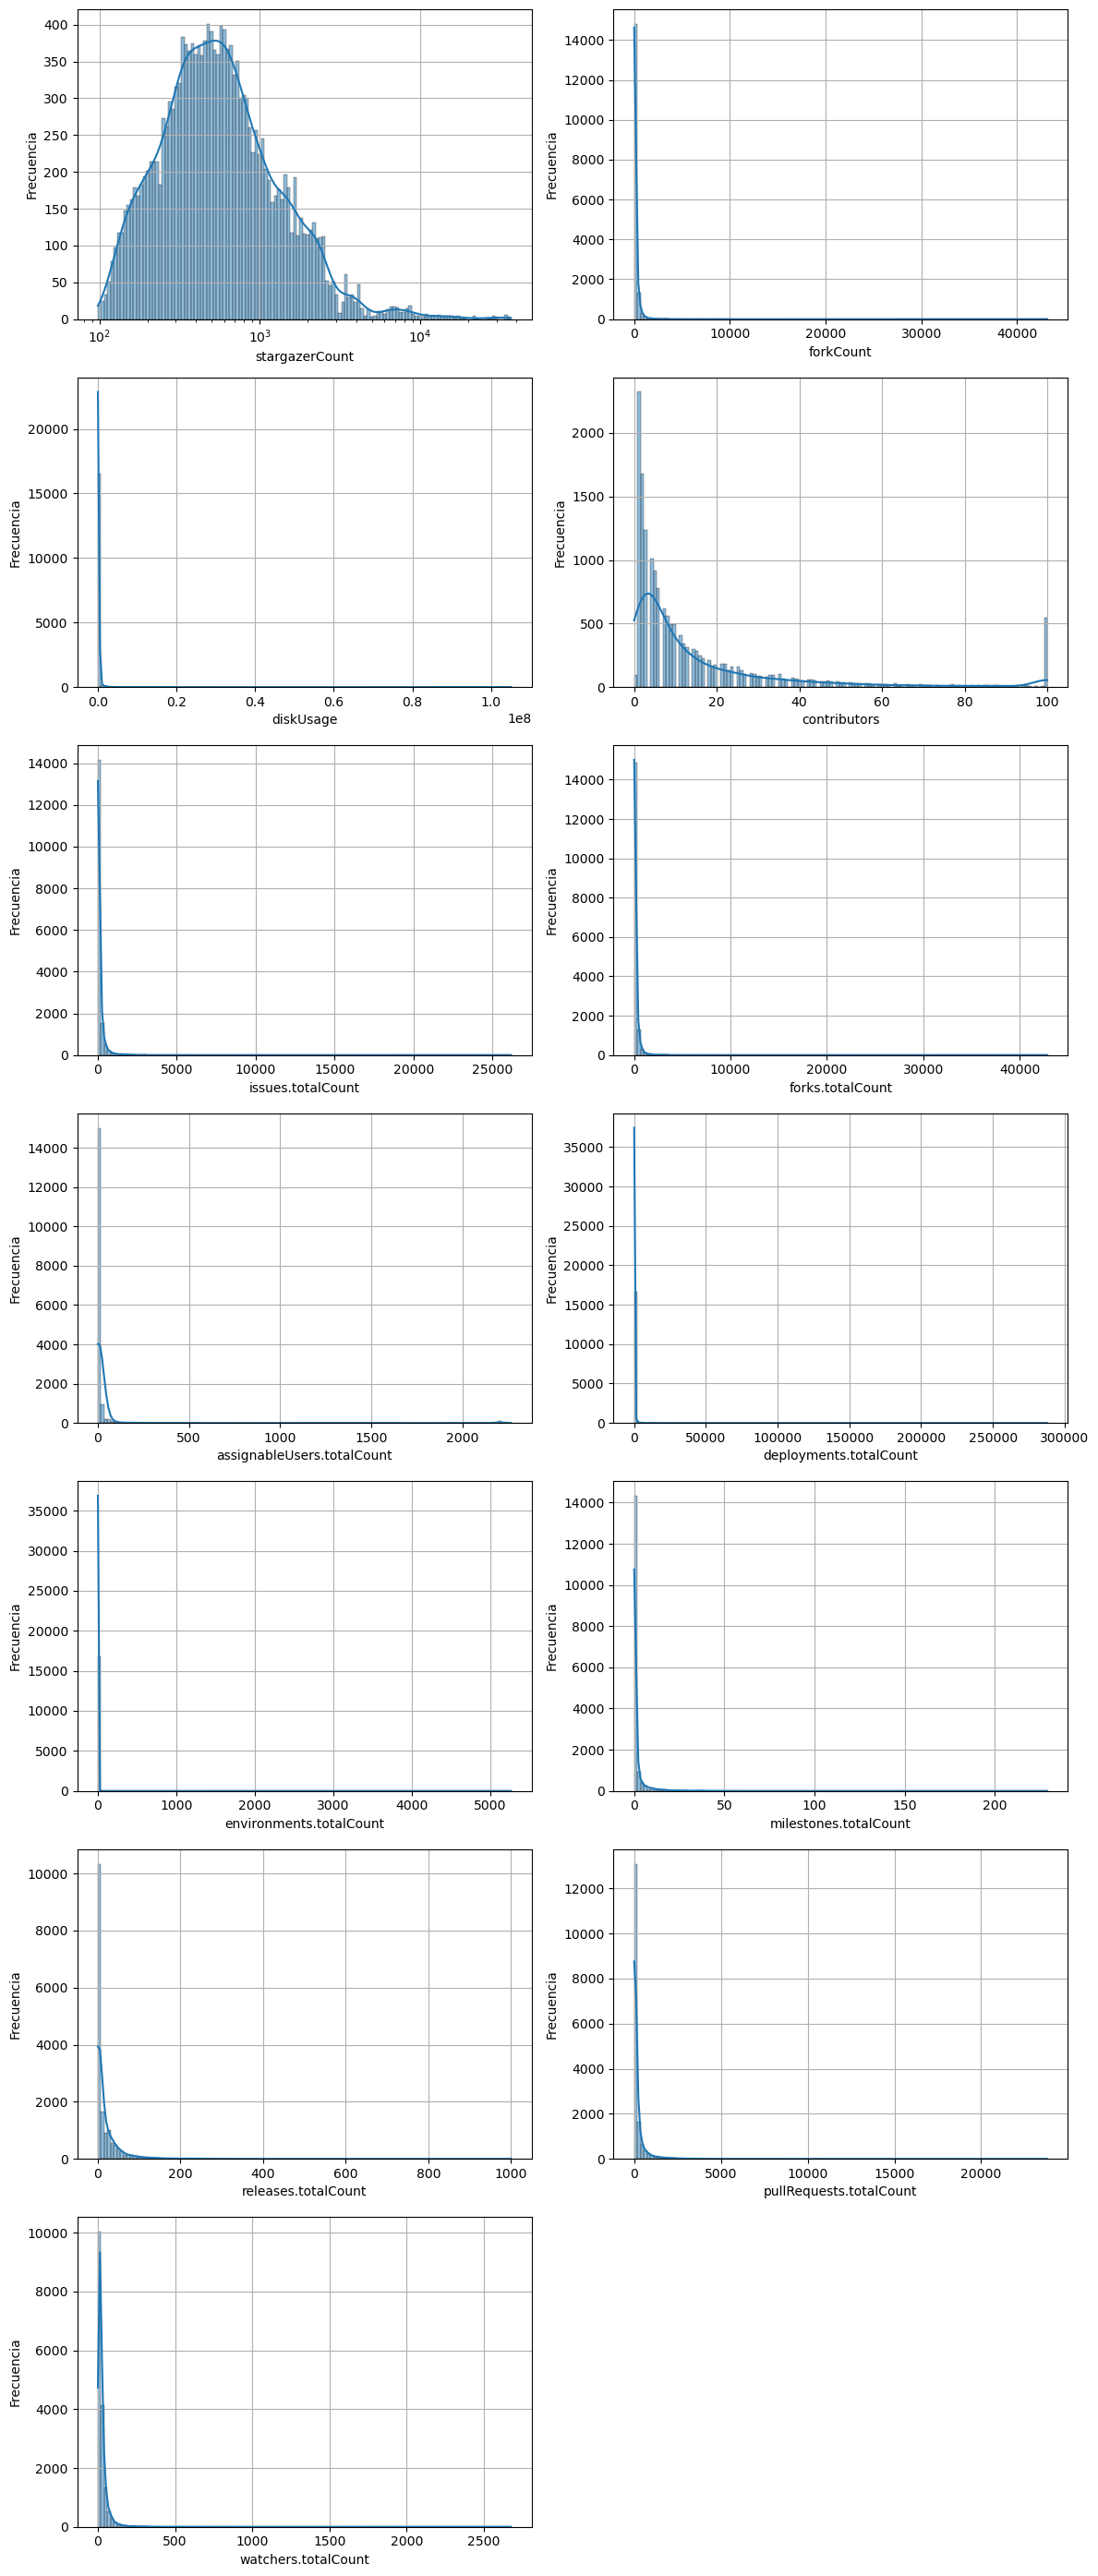

In [23]:
# dibujar los histogramas de outliers

# Dibujar histogramas solo de los valores numéricos extremos graves

num_cols = len(columnas_numericas)
num_rows = (num_cols + 1) // 2  # Calcular el número de filas necesarias para 2 columnas

fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))
axes = axes.flatten()  # Aplanar el array de ejes para facilitar el acceso

for i, col in enumerate(columnas_numericas):
    ax = axes[i]
    
    # Calcular un número dinámico de bins basado en la cantidad de datos de la columna
    data_count = df_extremos[col].count()
    bins = int(np.sqrt(data_count)) if data_count > 0 else 10  # Usar sqrt(n) para determinar los bins, con mínimo 10 bins

    # Evitar problemas con datos no positivos en la escala logarítmica
    if (df_extremos[col] > 0).all():
        sns.histplot(df_extremos[col], bins=bins, ax=ax, kde=True, log_scale=(True, False))  # Escala log en el eje x
    else:
        sns.histplot(df_extremos[col], bins=bins, ax=ax, kde=True)  # Sin log si hay ceros o negativos

    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Frecuencia', fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=10)
    
    # Añadir grid para mayor legibilidad
    ax.grid(True)

# Ocultar ejes vacíos si hay un número impar de columnas
if num_cols % 2 != 0:
    axes[-1].axis('off')  # Desactiva el último eje si hay un número impar

# Ajustar el diseño para que no se superpongan
plt.tight_layout()
plt.show()



Columnas numéricas: ['stargazerCount', 'forkCount', 'diskUsage', 'contributors', 'issues.totalCount', 'forks.totalCount', 'assignableUsers.totalCount', 'deployments.totalCount', 'environments.totalCount', 'milestones.totalCount', 'releases.totalCount', 'pullRequests.totalCount', 'watchers.totalCount']


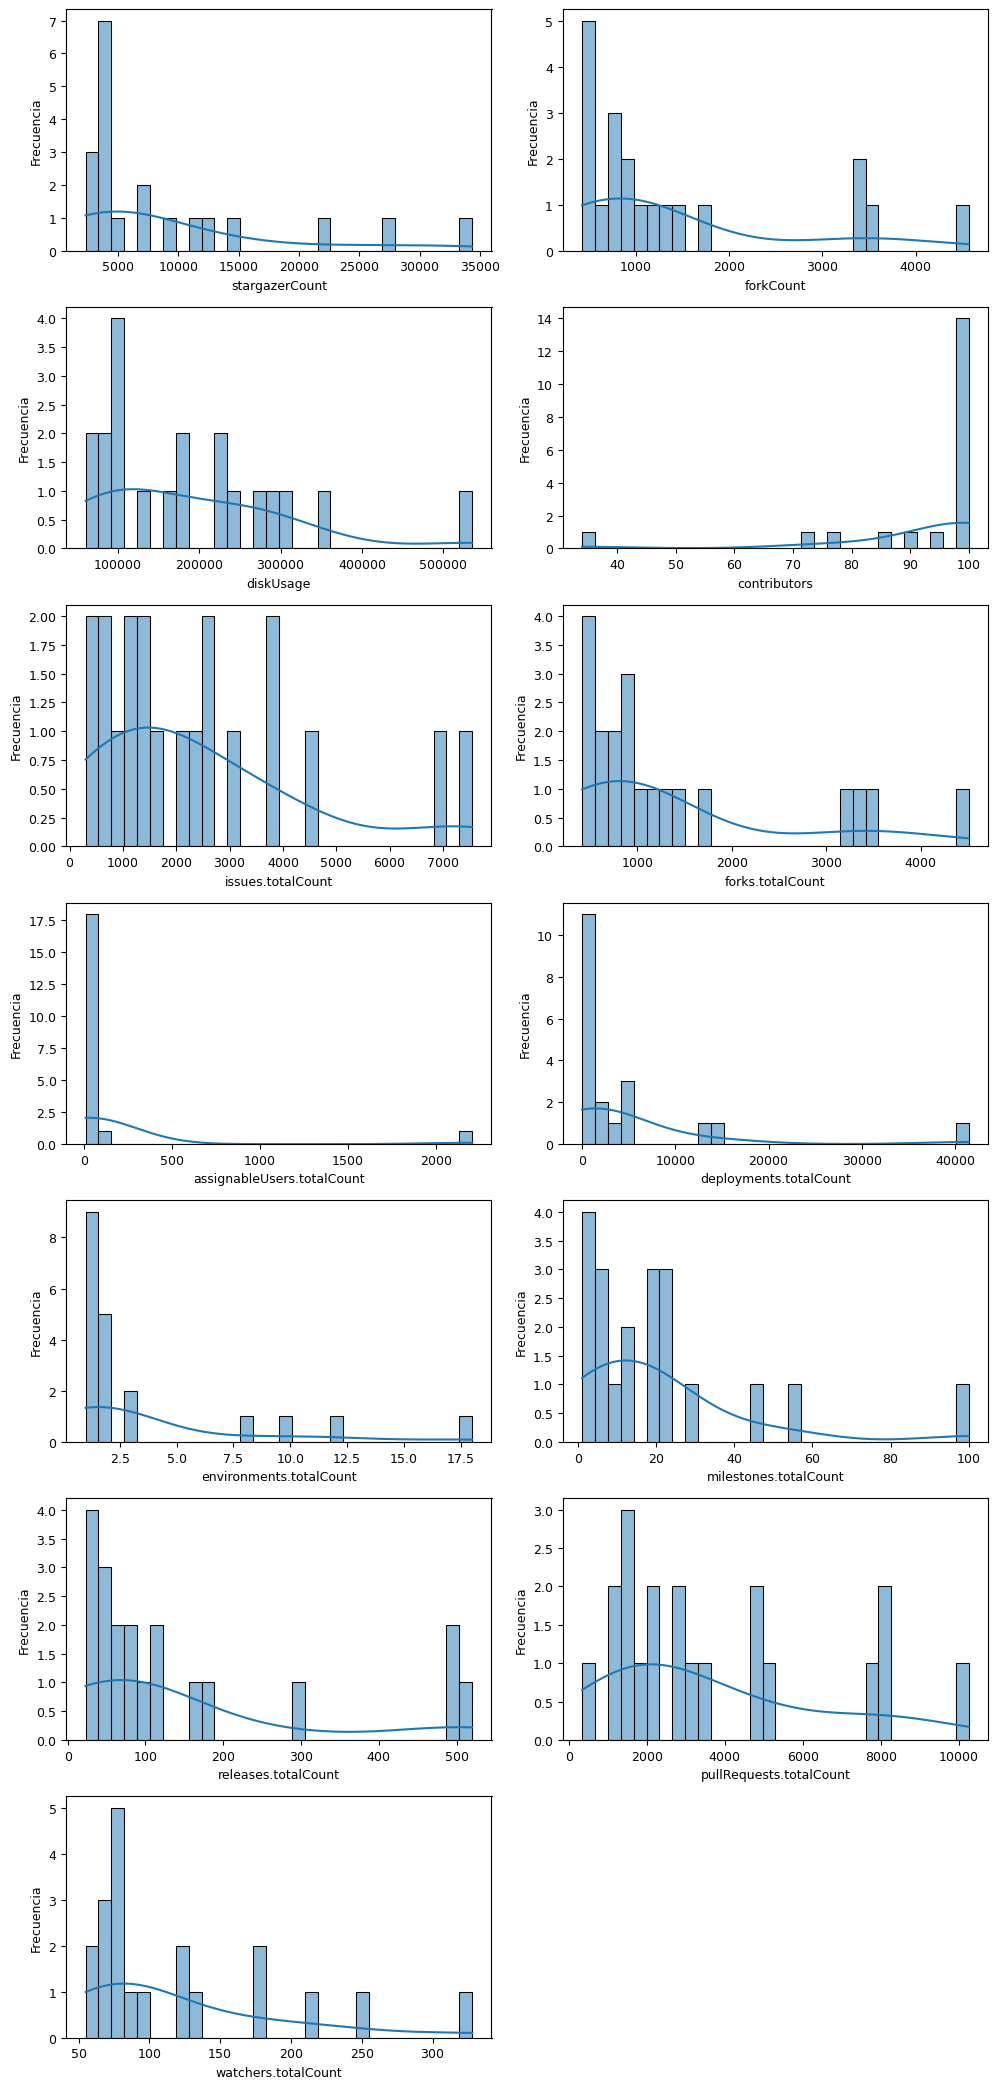

In [24]:

# 4. Crear un df con los registros de valores numéricos extremos graves
def filter_outliers(df, extremes_dict):
    df_outliers = df.copy()
    for col, extreme_value in extremes_dict.items():
        df_outliers = df_outliers[df_outliers[col] > extreme_value]
    return df_outliers

df_outliers = filter_outliers(df_copy, extremes_dict)
print("Columnas numéricas:", columnas_numericas)

# Dibujar histogramas solo de los valores numéricos extremos graves
num_cols = len(columnas_numericas)
num_rows = (num_cols + 1) // 2  # Calcular el número de filas necesarias para 2 columnas

fig, axes = plt.subplots(num_rows, 2, figsize=(10, num_rows * 3))
axes = axes.flatten()  # Aplanar el array de ejes para facilitar el acceso

for i, col in enumerate(columnas_numericas):
    ax = axes[i]
    sns.histplot(df_outliers[col], bins=30, ax=ax, kde=True)  # Se agrega kde para mejor visualización
    #ax.set_title(f'{col}', fontsize=9)
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel('Frecuencia', fontsize=9)
    ax.tick_params(axis='both', which='major', labelsize=9)

# Ocultar ejes vacíos si hay un número impar de columnas
if num_cols % 2 != 0:
    axes[-1].axis('off')  # Desactiva el último eje si hay un número impar

# Ajustar el diseño para que no se superpongan
plt.tight_layout()
plt.show()


In [25]:
# guardar los outliers en json específico
df_outliers.to_json('D:\\Dev\\github-scrapping-02\\Data\\df_outliers.json', orient='records', lines=True)

In [26]:
# Contar el número de registros donde contributors = 100
count_contributors_100 = len(df_copy[df_copy['contributors'] == 100])

# Calcular el porcentaje de esos registros sobre el total
contributors_percentage = (count_contributors_100 / len(df_copy)) * 100

# Mostrar el porcentaje con dos decimales
print(f"Contributors con valor 100 en % sobre total, contando outliers: {contributors_percentage:.2f}%")


Contributors con valor 100 en % sobre total, contando outliers: 1.47%


In [27]:
# Filtrar los registros donde contributors es igual a 100
df_contributors_100 = df_copy[df_copy['contributors'] == 100]

# Mostrar las primeras 5 filas de los registros filtrados
df_contributors_100['isInOrganization']


20        True
43        True
52        True
121       True
190       True
         ...  
36606     True
36678     True
36744    False
36803     True
36974     True
Name: isInOrganization, Length: 547, dtype: bool

In [28]:
df_copy['contributors'].describe()

count   37120.00
mean        9.35
std        16.72
min         0.00
25%         1.00
50%         3.00
75%         9.00
max       100.00
Name: contributors, dtype: float64

In [29]:
# ¿cuántos hay por encima de Q3?

# Calcular el tercer cuartil (Q3)
Q3 = df_copy['contributors'].quantile(0.75)

# Contar los registros donde contributors es mayor que Q3
count_greater_than_Q3 = len(df_copy[df_copy['contributors'] > Q3])

# Calcular el porcentaje sobre el total
percentage_greater_than_Q3 = (count_greater_than_Q3 / len(df_copy)) * 100

# Mostrar resultados
print(f"Número de registros con contributors > Q3: {count_greater_than_Q3}")
print(f"Porcentaje sobre total: {percentage_greater_than_Q3:.2f}%")



Número de registros con contributors > Q3: 8864
Porcentaje sobre total: 23.88%


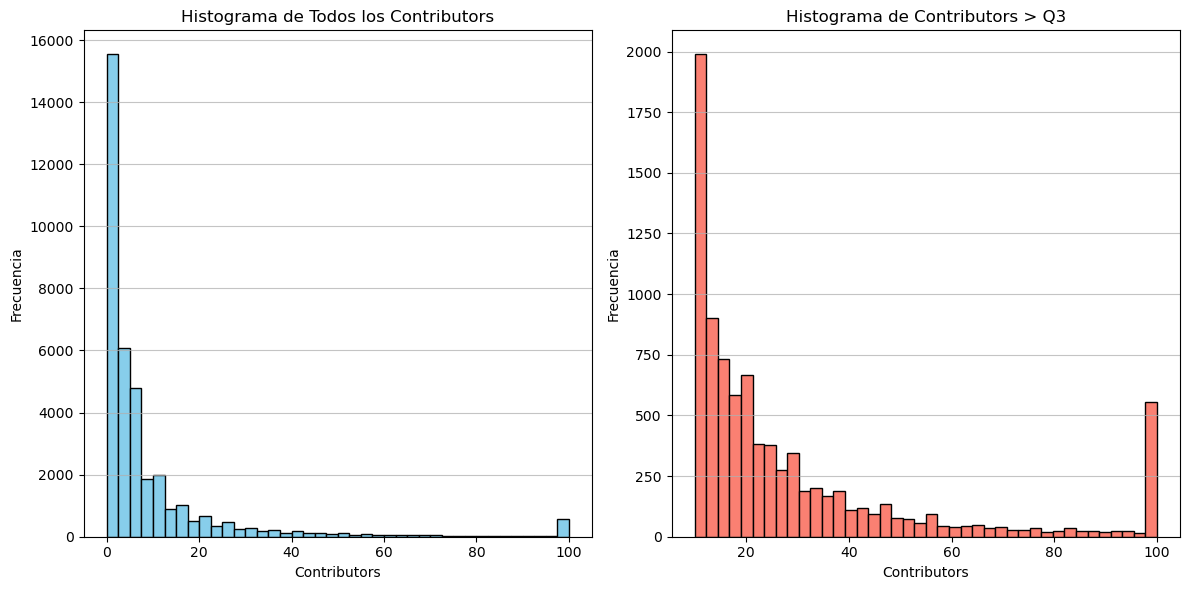

In [30]:
# cómo son esos por encima de Q3
# Filtrar los registros donde contributors es mayor que Q3
filtered_data = df_copy[df_copy['contributors'] > Q3]

# Crear subgráficos para los histogramas
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histograma para todos los contributors
axs[0].hist(df_copy['contributors'], bins=40, color='skyblue', edgecolor='black')
axs[0].set_title('Histograma de Todos los Contributors')
axs[0].set_xlabel('Contributors')
axs[0].set_ylabel('Frecuencia')
axs[0].grid(axis='y', alpha=0.75)

# Histograma para contributors > Q3
axs[1].hist(filtered_data['contributors'], bins=40, color='salmon', edgecolor='black')
axs[1].set_title('Histograma de Contributors > Q3')
axs[1].set_xlabel('Contributors')
axs[1].set_ylabel('Frecuencia')
axs[1].grid(axis='y', alpha=0.75)

# Ajustar el diseño para evitar superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()

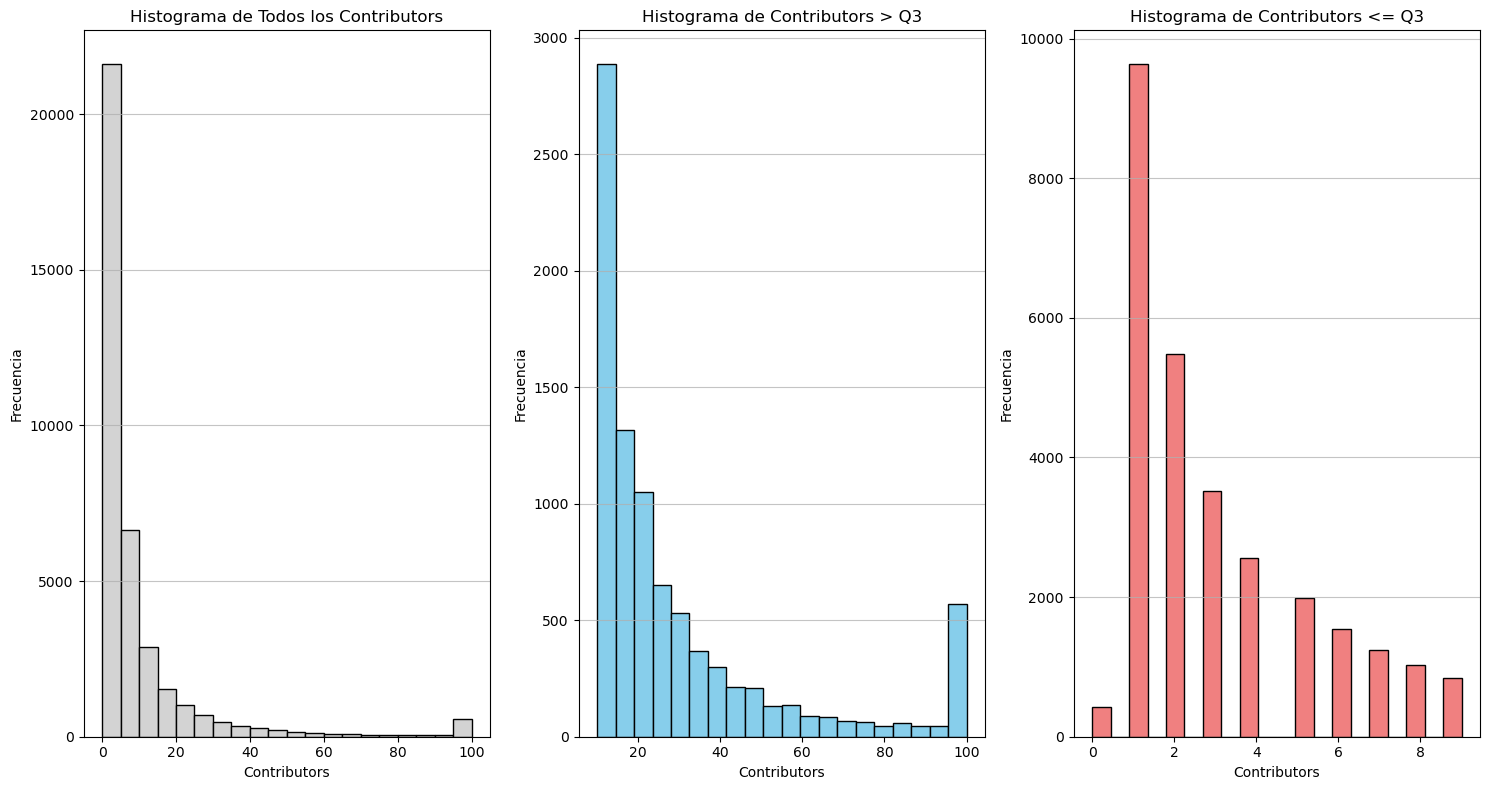

In [31]:
# histogramas de contributors
# Calcular el tercer cuartil (Q3)
Q3 = df_copy['contributors'].quantile(0.75)

# Filtrar los registros
data_above_Q3 = df_copy[df_copy['contributors'] > Q3]
data_below_Q3 = df_copy[df_copy['contributors'] <= Q3]

# Crear histogramas
plt.figure(figsize=(15, 8))

# Histograma de todos los contributors
plt.subplot(1, 3, 1)
plt.hist(df_copy['contributors'], bins=20, color='lightgray', edgecolor='black')
plt.title('Histograma de Todos los Contributors')
plt.xlabel('Contributors')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

# Histograma de contributors > Q3
plt.subplot(1, 3, 2)
plt.hist(data_above_Q3['contributors'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Contributors > Q3')
plt.xlabel('Contributors')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

# Histograma de contributors <= Q3
plt.subplot(1, 3, 3)
plt.hist(data_below_Q3['contributors'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histograma de Contributors <= Q3')
plt.xlabel('Contributors')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

# Ajustar el layout
plt.tight_layout()
plt.show()

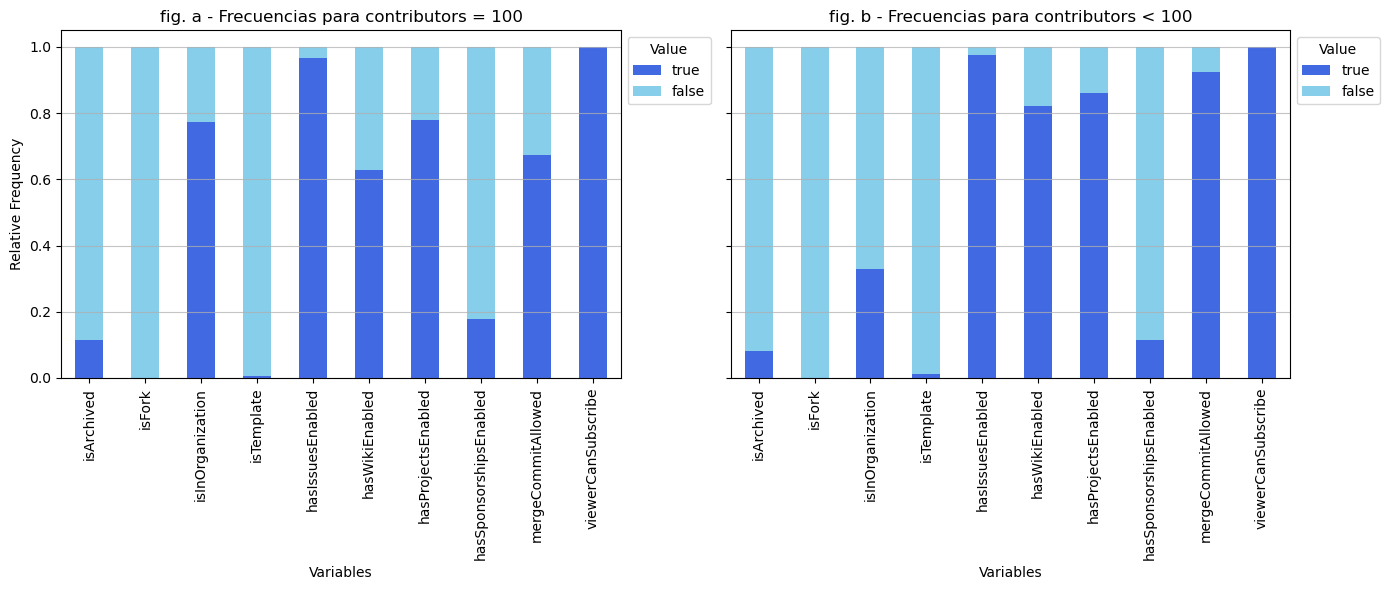

Frequencies for Contributors = 100:
                 variable  true  false
0              isArchived  0.12   0.88
1                  isFork  0.00   1.00
2        isInOrganization  0.77   0.23
3              isTemplate  0.01   0.99
4        hasIssuesEnabled  0.97   0.03
5          hasWikiEnabled  0.63   0.37
6      hasProjectsEnabled  0.78   0.22
7  hasSponsorshipsEnabled  0.18   0.82
8      mergeCommitAllowed  0.67   0.33
9      viewerCanSubscribe  1.00   0.00

Frequencies for Contributors < 100:
                 variable  true  false
0              isArchived  0.08   0.92
1                  isFork  0.00   1.00
2        isInOrganization  0.33   0.67
3              isTemplate  0.01   0.99
4        hasIssuesEnabled  0.98   0.02
5          hasWikiEnabled  0.82   0.18
6      hasProjectsEnabled  0.86   0.14
7  hasSponsorshipsEnabled  0.11   0.89
8      mergeCommitAllowed  0.92   0.08
9      viewerCanSubscribe  1.00   0.00


In [32]:
# Indagando algo más en contributors
# ¿Cómo son las boolean para los repos que tienen contributors = 100?
# Lista de variables booleanas
boolean_columns = [
    'isArchived',
    'isFork',
    'isInOrganization',
    'isTemplate',
    'hasIssuesEnabled',
    'hasWikiEnabled',
    'hasProjectsEnabled',
    'hasSponsorshipsEnabled',
    'mergeCommitAllowed',
    'viewerCanSubscribe'
]


color1 = 'royalblue'  # Royal Blue
color2 = 'skyblue'   # Cornflower Blue

# Función para calcular frecuencias relativas
def calculate_frequencies(df):
    frequency_rows = []
    for column in boolean_columns:
        relative_freq = df[column].value_counts(normalize=True)
        true_freq = relative_freq.get(True, 0)
        false_freq = relative_freq.get(False, 0)
        
        frequency_rows.append({
            'variable': column,
            'true': true_freq,
            'false': false_freq
        })
    return pd.DataFrame(frequency_rows)

# DataFrame con contributors igual a 100
df_contributors_100 = df_copy[df_copy['contributors'] == 100]

# DataFrame con contributors por debajo de 100
df_contributors_below_100 = df_copy[df_copy['contributors'] < 100]

# Calcular frecuencias para ambos DataFrames
frequency_df_100 = calculate_frequencies(df_contributors_100)
frequency_df_below_100 = calculate_frequencies(df_contributors_below_100)

# Crear un gráfico de barras para ambos conjuntos de datos
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico para contributors igual a 100
frequency_df_100.set_index('variable').plot(kind='bar', stacked=True, 
                                             color=[color1, color2], 
                                             ax=axs[0])
axs[0].set_title('fig. a - Frecuencias para contributors = 100')
axs[0].set_xlabel('Variables')
axs[0].set_ylabel('Relative Frequency')
axs[0].legend(title='Value', loc='upper left', bbox_to_anchor=(1, 1))
axs[0].grid(axis='y', alpha=0.75)

# Gráfico para contributors por debajo de 100
frequency_df_below_100.set_index('variable').plot(kind='bar', stacked=True, 
                                                   color=[color1, color2], 
                                                   ax=axs[1])
axs[1].set_title('fig. b - Frecuencias para contributors < 100')
axs[1].set_xlabel('Variables')
axs[1].legend(title='Value', loc='upper left', bbox_to_anchor=(1, 1))
axs[1].grid(axis='y', alpha=0.75)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# Mostrar tablas de frecuencias relativas
print("Frequencies for Contributors = 100:")
print(frequency_df_100)
print("\nFrequencies for Contributors < 100:")
print(frequency_df_below_100)

In [33]:
# prueba de proporción con z-test entre variables boolean para cada grupo

import statsmodels.api as sm

# Definir el nivel de significancia
alpha = 0.05

# Inicializar un DataFrame para almacenar los resultados
results = []

# Realizar el z-test para cada variable booleana
for column in boolean_columns:
    # Contar los valores
    count_true_100 = df_contributors_100[column].sum()
    count_false_100 = len(df_contributors_100) - count_true_100

    count_true_below_100 = df_contributors_below_100[column].sum()
    count_false_below_100 = len(df_contributors_below_100) - count_true_below_100

    # Realizar el z-test
    successes = [count_true_100, count_true_below_100]
    nobs = [count_true_100 + count_false_100, count_true_below_100 + count_false_below_100]

    z_stat, p_value = sm.stats.proportions_ztest(successes, nobs)

    # Guardar resultados
    results.append({
        'variable': column,
        'z_statistic': z_stat,
        'p_value': p_value,
        'significant': p_value < alpha
    })

# Convertir resultados a DataFrame
results_df = pd.DataFrame(results)

# Mostrar resultados
print(results_df)


                 variable  z_statistic  p_value  significant
0              isArchived         2.96     0.00         True
1                  isFork          NaN      NaN        False
2        isInOrganization        21.85     0.00         True
3              isTemplate        -0.88     0.38        False
4        hasIssuesEnabled        -1.34     0.18        False
5          hasWikiEnabled       -11.49     0.00         True
6      hasProjectsEnabled        -5.51     0.00         True
7  hasSponsorshipsEnabled         4.64     0.00         True
8      mergeCommitAllowed       -21.32     0.00         True
9      viewerCanSubscribe          NaN      NaN        False


C:\Tools\miniconda3\Lib\site-packages\statsmodels\stats\weightstats.py:792: RuntimeWarning: invalid value encountered in scalar divide
  zstat = value / std


In [34]:
# comprobar si hay desquilibrios entre los grupos
# en ese caso, z-test no se podría aplicar
import pandas as pd

# Supongamos que df_contributors_100 y df_contributors_below_100 están definidos
# Verifica el tamaño de cada grupo
size_100 = len(df_contributors_100)
size_below_100 = len(df_contributors_below_100)

# Imprime tamaños de las muestras
print(f"Tamaño de la muestra con contributors = 100: {size_100}")
print(f"Tamaño de la muestra con contributors < 100: {size_below_100}")

# Calcula la proporción de cada grupo
total_size = size_100 + size_below_100
proportion_100 = size_100 / total_size * 100 if total_size > 0 else 0
proportion_below_100 = size_below_100 / total_size * 100 if total_size > 0 else 0

# Imprime las proporciones
print(f"Proporción de la muestra con contributors = 100: {proportion_100:.2f}%")
print(f"Proporción de la muestra con contributors < 100: {proportion_below_100:.2f}%")

# Verifica si la diferencia en el tamaño de las muestras es significativa
if size_100 > size_below_100:
    difference = size_100 - size_below_100
else:
    difference = size_below_100 - size_100

# Define un umbral para considerar que las muestras están desbalanceadas
threshold = 0.2  # Por ejemplo, un 20% de diferencia

# Compara las proporciones
if abs(difference / total_size) > threshold:
    print("Las muestras están desequilibradas.")
else:
    print("Las muestras están equilibradas.")


Tamaño de la muestra con contributors = 100: 547
Tamaño de la muestra con contributors < 100: 36573
Proporción de la muestra con contributors = 100: 1.47%
Proporción de la muestra con contributors < 100: 98.53%
Las muestras están desequilibradas.


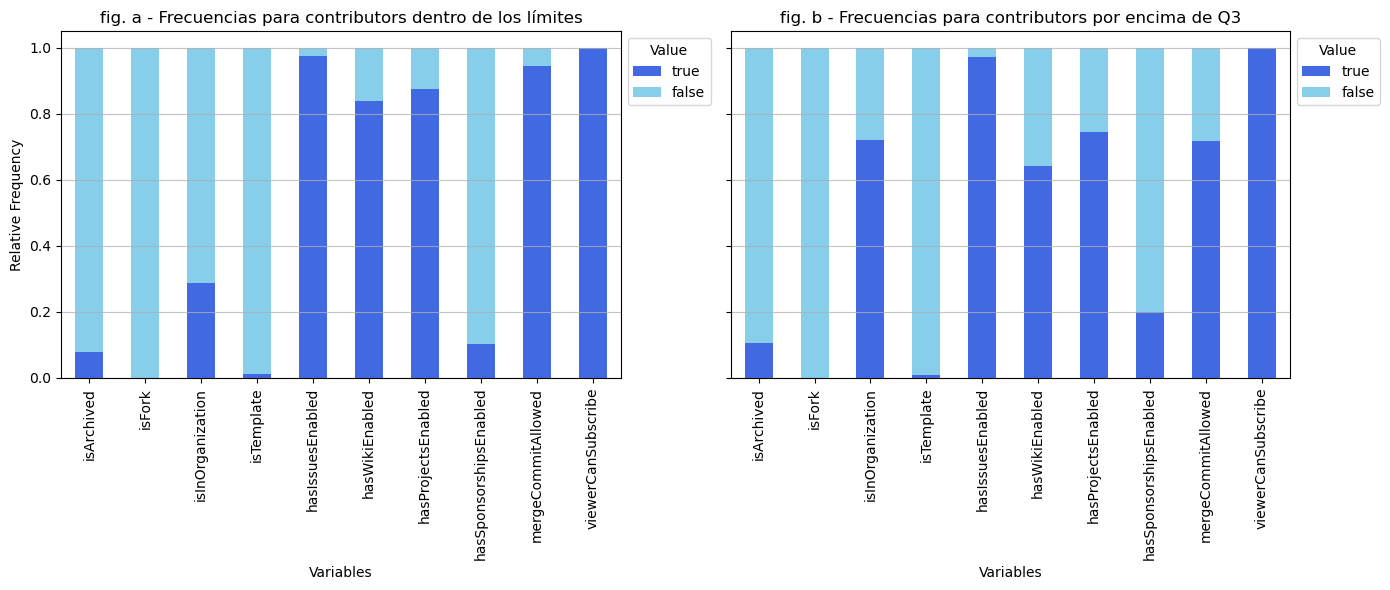

Frequencies for Contributors within bounds:
                 variable  true  false
0              isArchived  0.08   0.92
1                  isFork  0.00   1.00
2        isInOrganization  0.29   0.71
3              isTemplate  0.01   0.99
4        hasIssuesEnabled  0.98   0.02
5          hasWikiEnabled  0.84   0.16
6      hasProjectsEnabled  0.87   0.13
7  hasSponsorshipsEnabled  0.10   0.90
8      mergeCommitAllowed  0.94   0.06
9      viewerCanSubscribe  1.00   0.00

Frequencies for Contributors above upper bound:
                 variable  true  false
0              isArchived  0.11   0.89
1                  isFork  0.00   1.00
2        isInOrganization  0.72   0.28
3              isTemplate  0.01   0.99
4        hasIssuesEnabled  0.97   0.03
5          hasWikiEnabled  0.64   0.36
6      hasProjectsEnabled  0.74   0.26
7  hasSponsorshipsEnabled  0.20   0.80
8      mergeCommitAllowed  0.72   0.28
9      viewerCanSubscribe  1.00   0.00


In [35]:
# aplicando lo mismo, pero con diferenciando por valore extremos

# Lista de variables booleanas
boolean_columns = [
    'isArchived',
    'isFork',
    'isInOrganization',
    'isTemplate',
    'hasIssuesEnabled',
    'hasWikiEnabled',
    'hasProjectsEnabled',
    'hasSponsorshipsEnabled',
    'mergeCommitAllowed',
    'viewerCanSubscribe'
]

color1 = 'royalblue'  # Royal Blue
color2 = 'skyblue'   # Cornflower Blue

# Función para calcular frecuencias relativas
def calculate_frequencies(df):
    frequency_rows = []
    for column in boolean_columns:
        relative_freq = df[column].value_counts(normalize=True)
        true_freq = relative_freq.get(True, 0)
        false_freq = relative_freq.get(False, 0)
        
        frequency_rows.append({
            'variable': column,
            'true': true_freq,
            'false': false_freq
        })
    return pd.DataFrame(frequency_rows)

# Calcular Q1, Q3 y IQR
Q1 = df_copy['contributors'].quantile(0.25)
Q3 = df_copy['contributors'].quantile(0.75)
IQR = Q3 - Q1
LIM=1.5

# Limites para detectar valores extremos
lower_bound = Q1 - LIM * IQR
upper_bound = Q3 + LIM * IQR

# DataFrame con contributors dentro de los límites
df_contributors_within_bounds = df_copy[(df_copy['contributors'] >= lower_bound) & 
                                         (df_copy['contributors'] <= upper_bound)]

# DataFrame con contributors mayores que el límite superior
df_contributors_above_upper = df_copy[df_copy['contributors'] > upper_bound]

# Calcular frecuencias para ambos DataFrames
frequency_df_within_bounds = calculate_frequencies(df_contributors_within_bounds)
frequency_df_above_upper = calculate_frequencies(df_contributors_above_upper)

# Crear un gráfico de barras para ambos conjuntos de datos
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico para contributors dentro de los límites
frequency_df_within_bounds.set_index('variable').plot(kind='bar', stacked=True, 
                                                        color=[color1, color2], 
                                                        ax=axs[0])
axs[0].set_title('fig. a - Frecuencias para contributors dentro de los límites')
axs[0].set_xlabel('Variables')
axs[0].set_ylabel('Relative Frequency')
axs[0].legend(title='Value', loc='upper left', bbox_to_anchor=(1, 1))
axs[0].grid(axis='y', alpha=0.75)

# Gráfico para contributors mayores que el límite superior
frequency_df_above_upper.set_index('variable').plot(kind='bar', stacked=True, 
                                                      color=[color1, color2], 
                                                      ax=axs[1])
axs[1].set_title('fig. b - Frecuencias para contributors por encima de Q3')
axs[1].set_xlabel('Variables')
axs[1].legend(title='Value', loc='upper left', bbox_to_anchor=(1, 1))
axs[1].grid(axis='y', alpha=0.75)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# Mostrar tablas de frecuencias relativas
print("Frequencies for Contributors within bounds:")
print(frequency_df_within_bounds)
print("\nFrequencies for Contributors above upper bound:")
print(frequency_df_above_upper)


In [36]:
# Probando z-test con samples aleatorios entre valores extremos y el resto
# Definir el límite superior para identificar valores extremos (puedes ajustar este valor)

# Lista de variables booleanas. Eliminar las que solo tienen una categoría
boolean_columns = [
    'isArchived',
    'isInOrganization',
    'isTemplate',
    'hasIssuesEnabled',
    'hasWikiEnabled',
    'hasProjectsEnabled',
    'hasSponsorshipsEnabled',
    'mergeCommitAllowed'
]

# Calcular Q1, Q3 y IQR
Q1 = df_copy['contributors'].quantile(0.25)
Q3 = df_copy['contributors'].quantile(0.75)
IQR = Q3 - Q1
LIM = 1.5

# Limites para detectar valores extremos
lower_bound = Q1 - LIM * IQR
upper_limit = Q3 + LIM * IQR

# Filtrar los grupos
df_above_upper = df_copy[df_copy['contributors'] > upper_limit]
df_below_upper = df_copy[df_copy['contributors'] <= upper_limit]

# Determinar el tamaño del muestreo (por ejemplo, el tamaño del grupo menor)
sample_size = min(len(df_above_upper), len(df_below_upper))  # Tamaño mínimo entre los dos grupos

# Muestreo aleatorio, asegurando que no se exceda el tamaño de la población
if len(df_above_upper) >= sample_size:
    sample_above_upper = df_above_upper.sample(n=sample_size, random_state=42)
else:
    sample_above_upper = df_above_upper  # Usar todo el grupo si es más pequeño que sample_size

sample_below_upper = df_below_upper  # No se muestrea, se usa todo el grupo menor

# Inicializar un DataFrame para almacenar los resultados del z-test
results_random_sample = []

# Realizar el z-test para cada variable booleana
for column in boolean_columns:
    # Contar los valores
    count_true_above_upper = sample_above_upper[column].sum()
    count_false_above_upper = sample_size - count_true_above_upper

    count_true_below_upper = sample_below_upper[column].sum()
    count_false_below_upper = len(sample_below_upper) - count_true_below_upper

    # Realizar el z-test
    successes = [count_true_above_upper, count_true_below_upper]
    nobs = [count_true_above_upper + count_false_above_upper, count_true_below_upper + count_false_below_upper]

    z_stat, p_value = sm.stats.proportions_ztest(successes, nobs)

    # Guardar resultados
    results_random_sample.append({
        'variable': column,
        'z_statistic': z_stat,
        'p_value': p_value,
        'significant': p_value < 0.05  # Usando alpha = 0.05
    })

# Convertir resultados a DataFrame
results_random_sample_df = pd.DataFrame(results_random_sample)

# Mostrar resultados
# Imprimir el número de registros en cada grupo
print(f"Número de registros con contributors > (Q3 + 1.5 * IQR)={upper_limit}: {len(df_above_upper)}")
print(f"Número de registros con contributors <= (Q3 + 1.5 * IQR)={upper_limit}: {len(df_below_upper)}")
print(f"Tamaño del muestreo: {sample_size}")
print("Resultados del z-test con muestreo aleatorio entre grupos con contributors mayores que el extremo y el resto:")
print(results_random_sample_df)

Número de registros con contributors > (Q3 + 1.5 * IQR)=21.0: 3990
Número de registros con contributors <= (Q3 + 1.5 * IQR)=21.0: 33130
Tamaño del muestreo: 3990
Resultados del z-test con muestreo aleatorio entre grupos con contributors mayores que el extremo y el resto:
                 variable  z_statistic  p_value  significant
0              isArchived         6.34     0.00         True
1        isInOrganization        54.66     0.00         True
2              isTemplate        -1.08     0.28        False
3        hasIssuesEnabled        -2.03     0.04         True
4          hasWikiEnabled       -30.52     0.00         True
5      hasProjectsEnabled       -22.38     0.00         True
6  hasSponsorshipsEnabled        17.92     0.00         True
7      mergeCommitAllowed       -49.57     0.00         True


In [37]:
sample_size

3990

In [38]:
# visuualizar numero de registros con extremos graces

# Calcula los cuartiles y el IQR
Q1 = df_copy['contributors'].quantile(0.25)
Q3 = df_copy['contributors'].quantile(0.75)
IQR = Q3 - Q1
LIM=1.5

# Define los límites para los extremos graves
lower_bound = Q1 - LIM * IQR
upper_bound = Q3 + LIM * IQR

# Filtra los registros que están en los extremos graves
extremes = df_copy[(df_copy['contributors'] < lower_bound) | (df_copy['contributors'] > upper_bound)]

# Cuenta el número de registros en extremos graves
num_extremes = len(extremes)

# Cuenta el número de registros en el resto
num_remainder = len(df_copy) - num_extremes

# Imprime los resultados
print(f"Número de registros en extremos: {num_extremes}")
print(f"Número de registros en el resto: {num_remainder}")


Número de registros en extremos: 3990
Número de registros en el resto: 33130


In [39]:
# como esto está muy desquilibrado, se aplica alguna prueba no paramétrica
# para comparar grupos de booleans
# Prueba de Mann-Whitney U

from scipy.stats import mannwhitneyu

# Crear un DataFrame para almacenar resultados
mann_whitney_results = []

# Itera sobre cada variable
for col in boolean_columns:
    # Transforma las variables booleanas en 0 y 1
    group_100 = df_contributors_100[col].astype(int)
    group_below_100 = df_contributors_below_100[col].astype(int)
    
    # Realiza la prueba de Mann-Whitney U
    u_statistic, p = mannwhitneyu(group_100, group_below_100, alternative='two-sided')
    
    # Almacena los resultados
    mann_whitney_results.append({
        'variable': col,
        'u_statistic': u_statistic,
        'p_value': p,
        'significant': p < 0.05  # Considera significativa si p < 0.05
    })

# Convierte los resultados a un DataFrame
mann_whitney_df = pd.DataFrame(mann_whitney_results)

# Imprime los resultados
print(mann_whitney_df)


                 variable  u_statistic  p_value  significant
0              isArchived  10350401.50     0.00         True
1        isInOrganization  14447153.00     0.00         True
2              isTemplate   9962906.00     0.38        False
3        hasIssuesEnabled   9913965.00     0.18        False
4          hasWikiEnabled   8090186.00     0.00         True
5      hasProjectsEnabled   9178335.00     0.00         True
6  hasSponsorshipsEnabled  10639293.00     0.00         True
7      mergeCommitAllowed   7500155.00     0.00         True
